# Лабораторна робота №1

Тема: Ознайомлення з інструментами та базовими операціями у генеративному ШІ

2. Операції з масивами даних у NumPy та Pandas

In [1]:
import numpy as np
arr = np.array([1, 2, 3, 4, 5])
print(arr.mean())  

3.0


In [2]:
import pandas as pd
df = pd.DataFrame({'Name': ['Alice', 'Bob'], 'Age': [24, 27]})
print(df)

    Name  Age
0  Alice   24
1    Bob   27


3. Візуалізація даних за допомогою Matplotlib

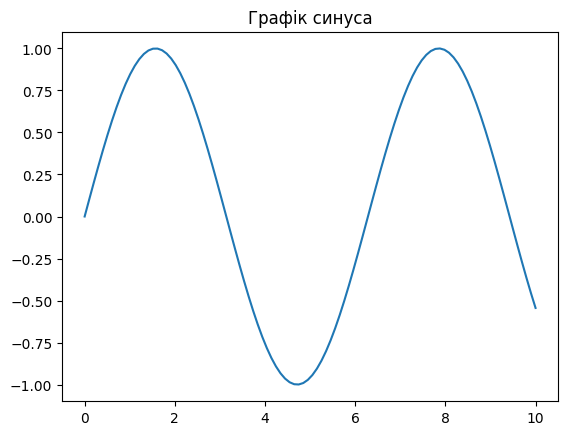

In [3]:
import matplotlib.pyplot as plt
x = np.linspace(0, 10, 100)
y = np.sin(x)
plt.plot(x, y)
plt.title('Графік синуса')
plt.show()

4. Створення та навчання простої нейронної мережі

Імопортуємо потрбіні бібліотеки

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

Визначанємо модель

- Перши шар: вхід - 28*28=784; вихід - 128
- функція активацї після першого шару
- Перши шар: вхід - 128; вихід - 10

In [5]:
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x


Завантажуємо навчальні дані та трансформуємо їх

In [6]:
transform = transforms.Compose([transforms.ToTensor()])
train_set = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=True)

Сторюємо модель, визначаємо функцію втрат і оптимізатор

In [7]:
model = NeuralNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Тренуємо модель

In [8]:
for epoch in range(5):
    total_batches = len(train_loader)

    for batch_idx, (images, labels) in enumerate(train_loader):
        outputs = model(images) # отримуємо передбачення
        loss = criterion(outputs, labels) # обчислюємо втрату
        
        # обчислюємо нові значення градієнтів та оновлюємо параметри
        optimizer.zero_grad() 
        loss.backward()
        optimizer.step()


        if batch_idx % 500 == 0:
            percentage_done = 100. * (batch_idx + 1) / total_batches
            print(f'Train Epoch: {epoch+1} [{batch_idx * len(images)}/{len(train_loader.dataset)} '
                  f'({percentage_done:.0f}%)]\tLoss: {loss.item():.6f}')

print('Навчання завершено!')

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.320439
Train Epoch: 1 [16000/60000 (27%)]	Loss: 0.209890
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.465898
Train Epoch: 1 [48000/60000 (80%)]	Loss: 0.098832
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.089981
Train Epoch: 2 [16000/60000 (27%)]	Loss: 0.202427
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.057982
Train Epoch: 2 [48000/60000 (80%)]	Loss: 0.038359
Train Epoch: 3 [0/60000 (0%)]	Loss: 0.024199
Train Epoch: 3 [16000/60000 (27%)]	Loss: 0.033979
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.323034
Train Epoch: 3 [48000/60000 (80%)]	Loss: 0.052218
Train Epoch: 4 [0/60000 (0%)]	Loss: 0.175631
Train Epoch: 4 [16000/60000 (27%)]	Loss: 0.168076
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.197981
Train Epoch: 4 [48000/60000 (80%)]	Loss: 0.041986
Train Epoch: 5 [0/60000 (0%)]	Loss: 0.019338
Train Epoch: 5 [16000/60000 (27%)]	Loss: 0.015862
Train Epoch: 5 [32000/60000 (53%)]	Loss: 0.067745
Train Epoch: 5 [48000/60000 (80%)]	Loss: 0.093681
Навчання завершено!


Перевіряємо точність натренованої моделі

In [9]:
correct = 0
total = 0
with torch.no_grad():
    for images, labels in train_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Точність моделі: {accuracy:.4f}')


Точність моделі: 0.9896


Контрольні питання
1. Які основні бібліотеки використовуються для роботи з генеративним ШІ?
2. Яка роль NumPy та Pandas у підготовці даних?
3. Як Matplotlib допомагає аналізувати результати?
4. Які кроки передбачає навчання нейронної мережі?
5. У чому різниця між PyTorch та TensorFlow?


Відповіді на контрольні запитання:
1) Основні бібліотеки для роботи з генеративним ШІ (штучним інтелектом) включають: Pythorch, Tensorflow, Keras
2) Numpy використовується для швидкої обробки та маніпуляції з даними таких як виконання математичних операцій, нормалізація, трансформація. Pandas використовується для імпорту, очищення, фільтрації та маніпуляцій даними для підготовки даних для подального використання
3) Візуалізація результатів навчання - графіки та діаграми
4) До кроків навчання нейроної мережі належать:
    - підготовка даних
    - визначення та ініціалізація моделі
    - визначення функції  втрат та опимізатор
    - навчання моделі
    - оцінка моделі
5) Pythorch використовує Dynamic Computation Graph, що дозволяє динамічно підлаштоватися під зміни та оновлення в процесі навчання. Tensorflow використовує Graph-Based Computation - спочатку визначається граф, а потім виконуються обчислення